# Initial Analysis of RF Drought Results

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datadir = '/g/data/w97/mg5624/RF_project/'
plotdir = '/g/data/w97/mg5624/plots/RF_project/results_analysis/'
scratch = '/scratch/w97/mg5624/plots/RF_project/results_analysis/'

# Load in datasets
drought_ds_full = xr.open_dataset(datadir + '/drought_prediction/full_model/drought_prediction_dataset_full_model.nc')
drought_ds_long_ts = xr.open_dataset(datadir + '/drought_prediction/long_ts_model/drought_prediction_dataset_long_ts_model.nc')

drought_events_full = drought_ds_full.drought
drought_events_long_ts = drought_ds_long_ts.drought

drought_proba_full = drought_ds_full.drought_proba
drought_proba_long_ts = drought_ds_long_ts.drought_proba

print(drought_ds_full)

<xarray.Dataset>
Dimensions:           (time: 504, lat: 221, lon: 271)
Coordinates:
  * time              (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2021-12-01
  * lat               (lat) float64 -38.0 -37.95 -37.9 ... -27.1 -27.05 -27.0
  * lon               (lon) float64 140.0 140.1 140.1 ... 153.4 153.4 153.5
Data variables:
    drought           (time, lat, lon) float64 ...
    drought_proba     (time, lat, lon) float64 ...
    no_drought_proba  (time, lat, lon) float64 ...


## Timseries Comparisons

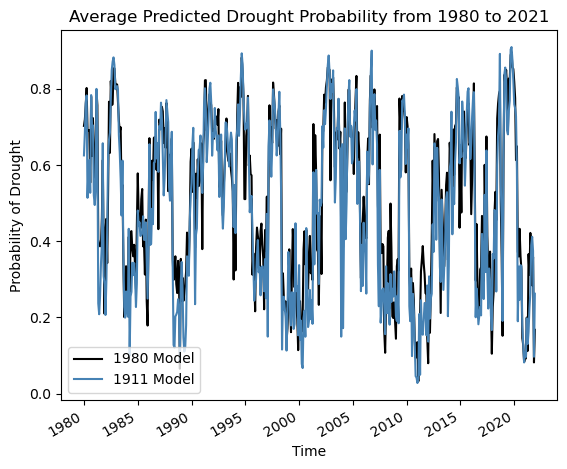

In [3]:
# This is just initial look - need weighted grid cells to be accurate
plt.figure()
drought_proba_full.sel(time=slice('1980', '2021')).mean(dim=('lat', 'lon')).plot(label='1980 Model', color='black')
drought_proba_long_ts.sel(time=slice('1980', '2021')).mean(dim=('lat', 'lon')).plot(label='1911 Model', color='steelblue')
plt.legend(loc='lower left')
plt.title('Average Predicted Drought Probability from 1980 to 2021')
plt.ylabel('Probability of Drought')
plt.xlabel('Time')
plt.savefig(plotdir + '/timeseries/drought_probability_1980-2022_long_ts_and_full_model.png')
plt.show()

/home/561/mg5624/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/561/mg5624/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/561/mg5624/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/561/mg5624/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

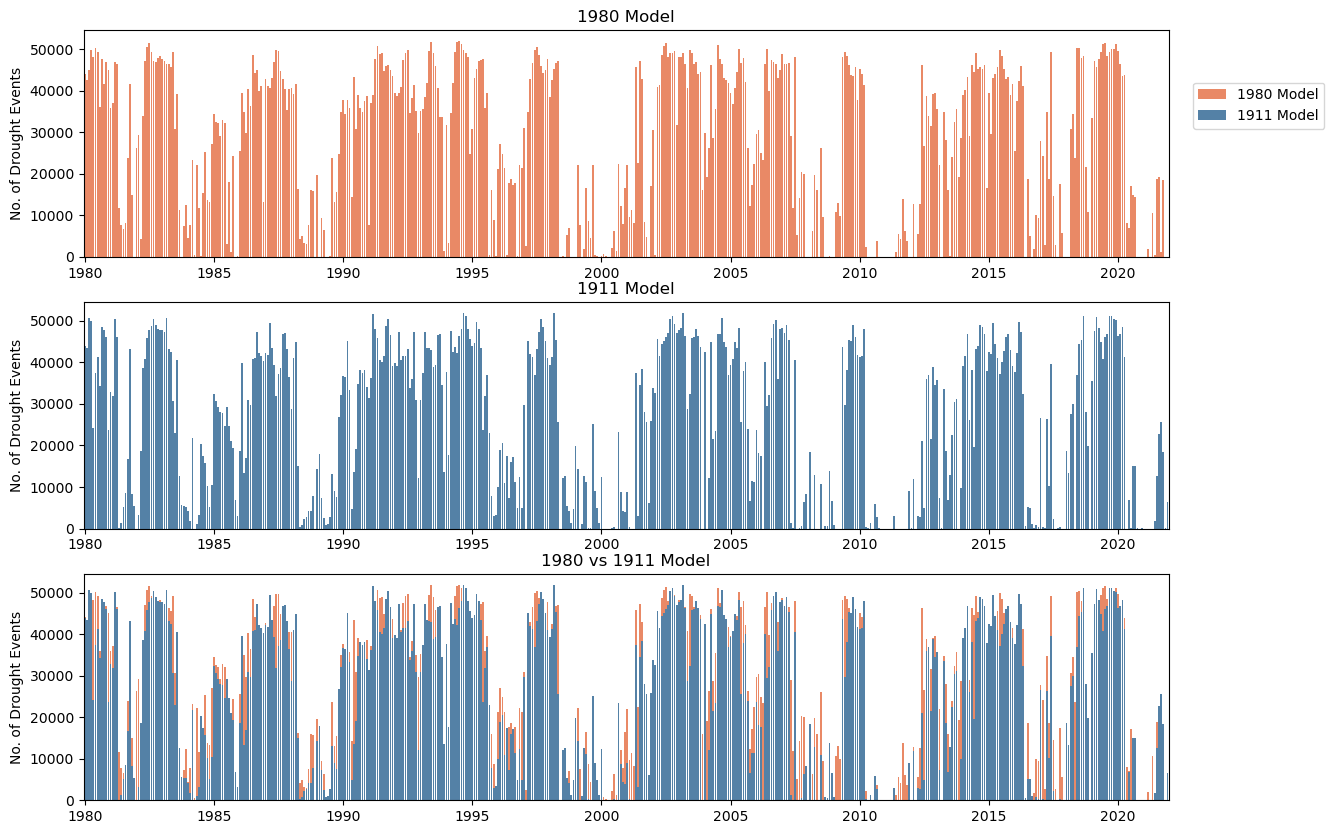

In [130]:
def set_xticks(data, axis, freq):
    """
    Sets xticks of a plot at the desired frequency (in years).

    Args:
        data (pd.DataFrame): data that is being plotted
        axis (plt.axes): axis that the data is plotted on (e.g. ax1, ax2, ...)
        freq (int): frequency of the xtixks (in years)
    """
    freq = freq * 12
    xticks = axis.get_xticks()
    axis.set_xticks(xticks[::freq])
    axis.set_xticklabels(summed_full_df.iloc[::freq]["time"].dt.strftime('%Y'))


summed_events_full = drought_events_full.sel(time=slice('1980', '2021')).sum(dim=('lat', 'lon'))
summed_events_long_ts = drought_events_long_ts.sel(time=slice('1980', '2021')).sum(dim=('lat', 'lon'))
summed_full_df = summed_events_full.to_dataframe()
summed_long_ts_df = summed_events_long_ts.to_dataframe()
summed_full_df.reset_index(inplace=True)
summed_long_ts_df.reset_index(inplace=True)

# PLot figure as single subplot
# fig = plt.figure(figsize=(14, 6))
# ax = plt.subplot()
# # print(summed_full_df.loc[(summed_full_df['time']>='2015-01') & (summed_full_df['time']<='2017-12')])
# sns.barplot(summed_full_df, x='time', y='drought', label='1980 Model', color='coral')
# sns.barplot(summed_long_ts_df, x='time', y='drought', label='1911 Model', color='steelblue')
# set_xticks(summed_full_df, ax, 5)
# plt.legend()
# plt.savefig(plotdir + '/timeseries/number_of_drought_events_1980_vs_1911.png', dpi=400)

# .plot(kind='bar', label='1980 Model', color='black')
# .plot(label='1911 Model', color='steelblue')
fig = plt.figure(figsize=(14, 10))
ax1 = plt.subplot(311)
sns.barplot(summed_full_df, x='time', y='drought', label='1980 Model', color='coral')
set_xticks(summed_full_df, ax1, 5)
plt.title('1980 Model')
plt.ylabel('No. of Drought Events')
plt.xlabel('')

ax2 = plt.subplot(312)
sns.barplot(summed_long_ts_df, x='time', y='drought', label='1911 Model', color='steelblue')
set_xticks(summed_full_df, ax2, 5)
plt.title('1911 Model')
plt.ylabel('No. of Drought Events')
plt.xlabel('')

ax3 = plt.subplot(313)
sns.barplot(summed_full_df, x='time', y='drought', label='1980 Model', color='coral')
sns.barplot(summed_long_ts_df, x='time', y='drought', label='1911 Model', color='steelblue')
set_xticks(summed_full_df, ax3, 5)
lgnd = plt.legend(loc='upper right', bbox_to_anchor=(1.15, 3.2))
plt.title('1980 vs 1911 Model')
plt.ylabel('No. of Drought Events')
plt.xlabel('')


plt.tight_layout()

plt.savefig(plotdir + '/timeseries/drought_events_1911_1980_model_comparison.png', dpi=400)
# set_xticks(summed_long_ts_df, ax2, 5)

## Full vs Long Timeseries Model

## Drought Events per Year

## Millenium and Tinderbox Drought Events

### Sptial Plots of Drought Probability over Events Years/Months

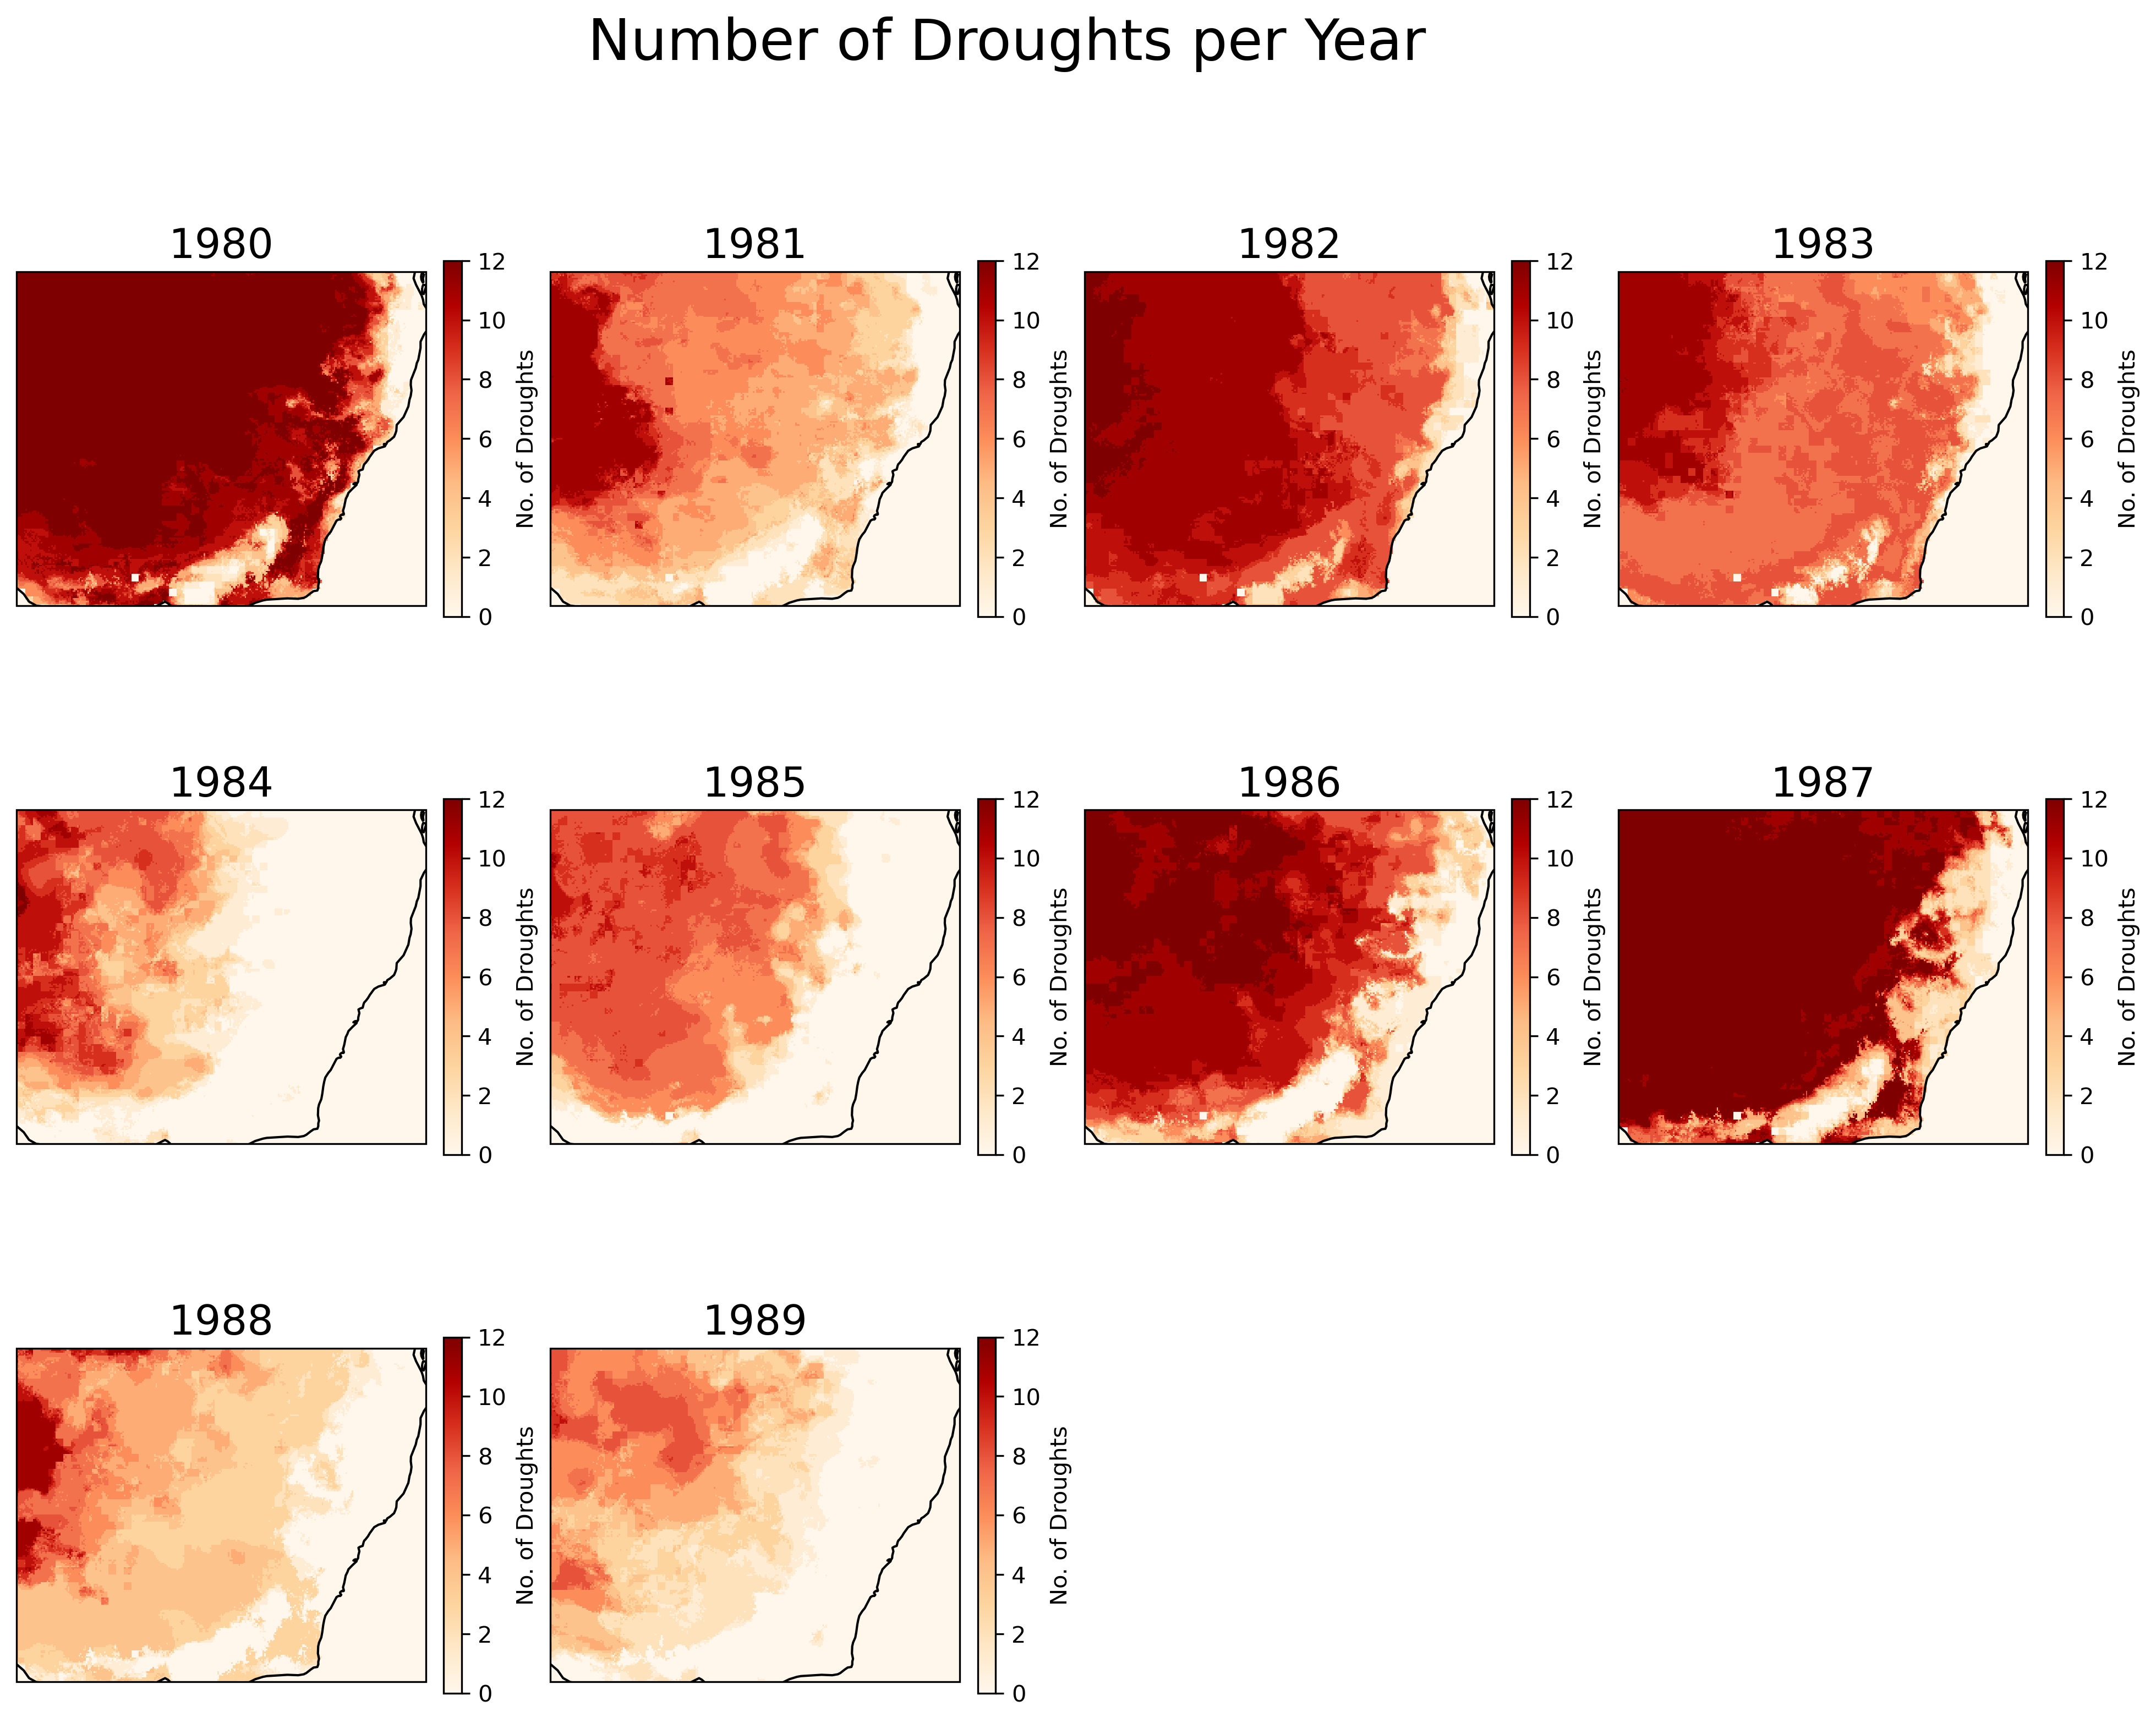

In [183]:
import math
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import os

datadir = '/g/data/w97/mg5624/RF_project/'
plotdir = '/g/data/w97/mg5624/plots/RF_project/results_analysis/'
scratch = '/scratch/w97/mg5624/plots/RF_project/results_analysis/'

# Number of drought events per year
drought_events_per_year = drought_events_full.groupby('time.year').sum('time')

drought_events_per_year_1980s = drought_events_per_year.sel(year=slice('1980', '1989'))
num_plots = len(drought_events_per_year_1980s['year'].values)
num_cols = 4
num_rows = math.ceil(num_plots / num_cols)

plt.figure(figsize=(16, 12), dpi=300)
plt.suptitle('Number of Droughts per Year', fontsize=25)
for i in range(num_rows):
    for j in range(num_cols):
        index = (i * num_cols) + j
        if index < num_plots:
            year_drought_map = drought_events_per_year_1980s.isel(year=index)      
            ax = plt.subplot2grid((num_rows, num_cols), (i, j), projection=ccrs.PlateCarree())
            year = year_drought_map['year'].values
            cbar_sets = {'fraction': 0.04, 'pad': 0.04, 'label': 'No. of Droughts'}
            plot = year_drought_map.plot.pcolormesh(cmap='OrRd', vmin=0, vmax=12, cbar_kwargs=cbar_sets)
            ax.coastlines(resolution='50m')
            plt.title(year, fontsize=18)
            # plt.tight_layout()

figpath = scratch + '/spatial_maps/drought_events/'
if not os.path.exists(figpath):
    os.makedirs(figpath)

figname = 'droughts_per_year_from_1980_to_1989.png'
plt.savefig(figpath + figname)
plt.show()
    # plt.colorbar(plot, label='No. of Droughts', fraction=0.046, pad=0.04)